<a href="https://colab.research.google.com/github/karelyrodri/Machine-Learning-CS5262-50/blob/main/CS5262_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Risk 

## Background 
The data used consists of a financial information regarding loans and credit 

After data clean up, there is 15,787 records and 12 features that will be used

Numeric Columns:
1.   Loan Amount
2.   Credit Score
3.   Annual Income 
4.   Monthly Debt 
5.   Years of Credit History
6.   Credit Card Balance
7.   Credit Card Limit 
8.   Interest Rate

Categorical Columns:
1.   Loan Term Length - [1 year, 3 year, 5 year, 7 year, 10 year, 15 year, 30 year]
2.   Years in Current Job - [1 Year or Less, 2 - 4 years, 5 - 7 years,  8 - 9 years, 10+ years]
3.   Home Ownership - [Rent, Home Mortgage, Home Owner]
4.   Loan Purpose - [Home Improvements, Business Loan, Car Loan, Home Loan,
 Medical Bills, Educational Expenses]








## Project Description

This project will focus on assessing loan/credit risk. 

This is the probability an individal will be unable to repay their debt obligations. The goal is to predict whether there is or is not credit risk given the information supplied in each record.

0 - Not a Credit Risk

1 - Is a Credit Risk

## Performance Metric
*   Precision =  True Positives/(True Positives + False Positives)
*   Recall =  True Positives/(True Positives + False Negatives)
*   F1 Score = 2 x ((Precision x Recall)/(Precision + Recall))

 

# Load Data


## Python imports

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
# machine learning libs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

> Read google spreadsheet as a csv

In [153]:
data = pd.read_csv("https://docs.google.com/spreadsheets/d/1AvPiqVtKBoKFiX4h3uGFbWBty7ZhNt4FmWU6jrXhb8U/export?format=csv&grid=")
display(data)
data.info()

,Loan_Amount,Term,Interest_Rate,Credit_Score,Years_in_Current_Job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Credit_Cards_Balance,Credit_Cards_Limit,Credit_Risk
0,6966,1 year,8.010,673.0,1 year or less,Home Mortgage,54736.0,Home Improvements,839.28,16.4,2942,3881,1
1,9848,3 year,5.570,NaN,5 - 7 years,Rent,NaN,Home Improvements,605.65,18.8,6957,8568,1
2,5878,1 year,5.570,743.0,1 year or less,Home Mortgage,107767.0,Home Improvements,1420.73,24.6,35963,89459,0
3,99999999,3 year,6.435,724.0,2 - 4 years,Rent,27462.0,Car Loan,338.69,10.8,11773,15369,1
4,1010,1 year,6.435,745.0,1 year or less,Home Mortgage,75713.0,Home Improvements,1242.95,18.0,769,17889,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21336,188256,30 year,4.295,741.0,2 - 4 years,Home Mortgage,136904.0,Home Loan,1996.51,16.4,17931,23532,0
21337,4542,1 year,7.825,722.0,1 year or less,Rent,33125.0,Home Improvements,665.27,11.3,11325,20972,0
21338,15730,7 year,4.295,725.0,10+ years,Home Mortgage,60952.0,Home Improvements,1056.51,18.1,9589,13660,0
21339,14727,3 year,5.370,745.0,5 - 7 years,Home Mortgage,78544.0,Educational Expenses,988.35,13.0,17083,31991,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21341 entries, 0 to 21340
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_Amount              21341 non-null  int64  
 1   Term                     21341 non-null  object 
 2   Interest_Rate            21341 non-null  float64
 3   Credit_Score             18168 non-null  float64
 4   Years_in_Current_Job     20649 non-null  object 
 5   Home_Ownership           21341 non-null  object 
 6   Annual_Income            18168 non-null  float64
 7   Purpose                  21341 non-null  object 
 8   Monthly_Debt             21341 non-null  float64
 9   Years_of_Credit_History  21341 non-null  float64
 10  Credit_Cards_Balance     21341 non-null  int64  
 11  Credit_Cards_Limit       21341 non-null  int64  
 12  Credit_Risk              21341 non-null  int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 2.1+ MB


## Data Clean Up
Remove data that will scew the results or is NAN or empty.


In [ ]:
data.isna().sum()

Loan_Amount                   0
Term                          0
Interest_Rate                 0
Credit_Score               3173
Years_in_Current_Job        692
Home_Ownership                0
Annual_Income              3173
Purpose                       0
Monthly_Debt                  0
Years_of_Credit_History       0
Credit_Cards_Balance          0
Credit_Cards_Limit            0
Credit_Risk                   0
dtype: int64

In [154]:
data = data.dropna()
data = data[data.Loan_Amount != 99999999] # there are 1905 values 0.089%
data = data[data.Years_in_Current_Job != ""]
data['Credit_Score'] = data['Credit_Score'].apply(np.int64)
print(data.shape, "\n")

print(data.isna().sum())

(15787, 13) 

Loan_Amount                0
Term                       0
Interest_Rate              0
Credit_Score               0
Years_in_Current_Job       0
Home_Ownership             0
Annual_Income              0
Purpose                    0
Monthly_Debt               0
Years_of_Credit_History    0
Credit_Cards_Balance       0
Credit_Cards_Limit         0
Credit_Risk                0
dtype: int64


# Exploratory Data Analysis


## Question 1. Is there a relationship between home ownership and income? Do those who rent have lower income? 

In [ ]:
avg = data.groupby('Home_Ownership').agg(Average_Income=("Annual_Income", "mean"), Standard_Deviation=("Annual_Income", "std"))
sorted = data.sort_values(by=["Annual_Income"])
percent_20 = int(15787 * .20)
print("20% of the total rows is: ", percent_20, " records")
avg["Bottom_20%"] = sorted.head(percent_20).groupby('Home_Ownership').agg(Bottom_20=("Annual_Income", "mean"))
avg["Top_20%"] = sorted.tail(percent_20).groupby('Home_Ownership').agg(Top_20=("Annual_Income", "mean"))
display(avg.round(2))

20% of the total rows is:  3157  records


,Average_Income,Standard_Deviation,Bottom_20%,Top_20%
Home_Ownership,,,,
Home Mortgage,77660.38,48922.04,32264.63,138299.57
Home Owner,61296.31,47666.10,30046.76,137923.30
Rent,60892.51,37279.66,31218.03,132526.17


### Findings
> The average annual income for home owners and renters is about the same amount. Those with mortgages make on average about 16k more. To get a sense of the dispersion of the values from the mean in each grouping, the standard deviation is calculated. The results are that those with a mortgage and those who own homes deviate about the same away from their mean. This gives a sense that those with mortgages are making a bit more annually. The deviation of the renters is lower meaning that those in this category are making slightly closer to that lower mean. This appears that the renters on an average are making less than those with a home mortgages but similar to those own homes. 

> When focusing on the average top and bottom 20% income for each grouping, there is not a significant difference. This means there is not many outliers in the data. The data concludes renters do not make less than home owners but rather earn about the same. We can conclude renters make less than those with a mortgage.


## 2. What is the most common purpose for a loan (exluding home loan) among those who rent, own, or have a mortgage? 

Text(0, 0.5, 'Records Count')

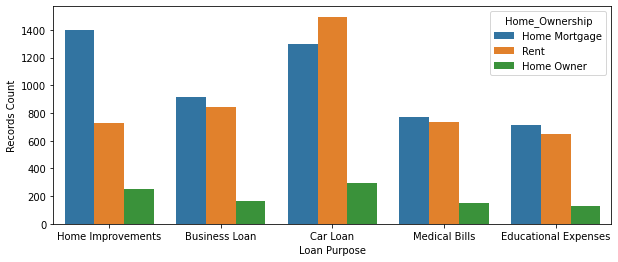

In [ ]:
plt.rcParams["figure.figsize"] = [10, 4]
loan_purpose = data.loc[data["Purpose"] != "Home Loan"]
sns.countplot(x = "Purpose", hue="Home_Ownership", data=loan_purpose)
plt.xlabel("Loan Purpose")
plt.ylabel("Records Count")

### Findings

> Among those who rent, the most common loan type is a Car Loan compared to those who have a mortgage most commonly have a loan for Home Improvements followed by a Car Loan. Home owners have the least amount of loans taken out in general. Their most common loan is a Car Loan however, the other loan types don't fall far behind.

> This lender seems to give out more Car Loans in total than any other loan type when excluding Home Loans.

## 3. Does credit score improve over time? Do those with longer credit history have higher credit scores?

Text(0, 0.5, 'Credit Score')

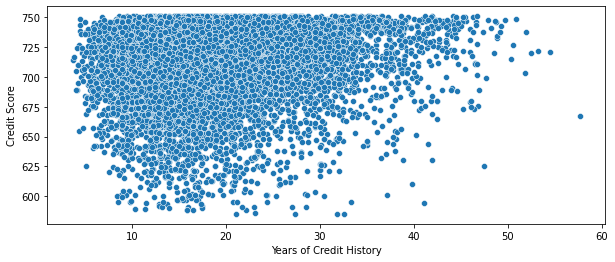

In [ ]:
sns.scatterplot(x=data['Years_of_Credit_History'], y=data['Credit_Score'])
plt.xlabel("Years of Credit History")
plt.ylabel("Credit Score")

### Findings
> The data does not seem to have a strong relationship between the amount of years with credit history and their credit score. The scatterplot shows a weak positive correlation. It isnt until about 40 years of history that we see more records with higher credit scores; any amount of years before that is highly unpredicatable. It is not guaranteed that time will improve credit score.

## 4. What are the portions of each loan purpose category? Which Purpose type are the most common and least common?

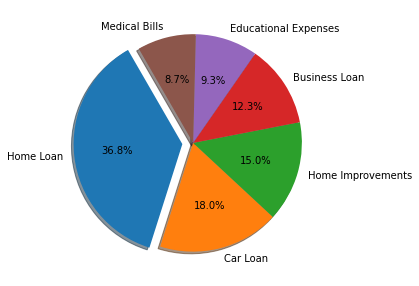

In [ ]:
plt.rcParams["figure.figsize"] = [5, 5]
purpose_counts = data['Purpose'].value_counts()
plt.pie(purpose_counts, labels=purpose_counts.index, shadow = True, autopct='%1.1f%%', explode= (0.1, 0, 0, 0, 0, 0), startangle=120)
plt.show()

### Findings
> The lender of the data set lends out the most Home Loans than any other type of loan. The top 3 types of loans are Home, Car, and Home Improvement loans that make up 68% of the data set. This is compared to the least common Business, Medical, and Educational loans. The pie chart demonstates those in the data set file to borrow money for perpetual voluntary reasons. 

# Feature Engineering


## Feature 1 - Credit_Cards_Balance and Credit_Cards_Limit 
> The Credit Cards Balance is the amount due on all credit lines and the Credit Cards Limit refers to the total limit amount of credit given to the record holder.

> The new feature will be labeled Credit Utilization and will be represented as a percentage with 2 decimal places. This is the percentage of how much of the available credit is used up.   
Formula: Credit Cards Balance / Credit Cards Limit

> The Credit Cards Limit column is only relevant as it relates to the credit Card balances. The limit column will be converted into the credit utilization ratio as lenders take this into account in the real world. The Credit Cards Balance is important and relevant as it adds to the amount borrowed however, The Credit Cards Limit is now taken in account and can be dismissed.

> Unite Testing: Inputs for each feature must be greater or equal to 0. The testing will be to ensure that those who contain a 0 in either feature will be set to a 0 utilization score and not NAN nor inf. 



In [155]:
limit = data["Credit_Cards_Limit"]
data["Credit_Utilization"] = round((data["Credit_Cards_Balance"] / data["Credit_Cards_Limit"]) * 100, 2)
data["Credit_Utilization"].replace(to_replace = [float('inf'), np.nan], value = 0, inplace=True)

display(data.head(3))

,Loan_Amount,Term,Interest_Rate,Credit_Score,Years_in_Current_Job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Credit_Cards_Balance,Credit_Cards_Limit,Credit_Risk,Credit_Utilization
0,6966,1 year,8.010,673,1 year or less,Home Mortgage,54736.0,Home Improvements,839.28,16.4,2942,3881,1,75.81
2,5878,1 year,5.570,743,1 year or less,Home Mortgage,107767.0,Home Improvements,1420.73,24.6,35963,89459,0,40.20
4,1010,1 year,6.435,745,1 year or less,Home Mortgage,75713.0,Home Improvements,1242.95,18.0,769,17889,0,4.30


In [156]:
data = data.drop(columns = ['Credit_Cards_Limit'])
display(data.columns)

Index(['Loan_Amount', 'Term', 'Interest_Rate', 'Credit_Score',
       'Years_in_Current_Job', 'Home_Ownership', 'Annual_Income', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History', 'Credit_Cards_Balance',
       'Credit_Risk', 'Credit_Utilization'],
      dtype='object')

## Feature 2 - Loan_Amount, Term, Interest_Rate, Annual_Income, Monthly Debt, Credit_Cards_Balance
> The Loan Amount and Credit Cards Balance refer to the amounts owed to the lender that are subject to the Interest Rate. The Term refers to the agreed upon length of time that the Loan Amount must be paid by. The Annual Income is the the amount the record holder earns yearly and the Monthly Debt is in regards to the amount they owe in all bills each month

> These features with be used to engineer a Debt to Income Ratio column. 
This calculation is used to describe the percentage of income used on bills on a monthly basis. The first step is to calculate the Compound Interest owed on the principle amounts. This will determine the exact amount owed including the additional interest charges by the end of the agreed term. Then we will be able to caluclate the monthly Debt to Income Ratio.
Formulas:
  *   Compound Interest:   
  (Loan Amount + Credit Cards Balance) * ((1.0+ (.001 * Interest Rate /4.0)) ** (Term * 4.0))
  *   Debt to Income ratio:    
  ((Compound / term / 12) + Monthly Debt) / (Annual Income /12)

> The Debt to Income Ratio is important as it gives better insight to whether the record holder will have the funds available each month to pay their monthly debts that includes the owed amount to the lender. Lenders 
take the Debt to Income Ratio in account in the real world. No Columns will be discarded, this new feature will only be added to the data set.

> Unit Testing: Inputs will be checked to ensure they are non-negative values. Because the term value is categorical and needs to undergo slicing and float conversion in order to calculate both Compound Interest and Debt to Income Ratio, we must test that the string is qualified to be successful when extracting the term number. The result should fall within the range 0 to 100

In [157]:
data["Term_Num"] = data["Term"].apply(lambda x: float(x.split(" ", 1)[0]))
data["Compound"] = data[["Loan_Amount", "Credit_Cards_Balance"]].sum(axis=1) * \
                  ((1.0+ (.001 * data["Interest_Rate"]/4.0)) ** (data["Term_Num"]  * 4.0))                
data["Debt_To_Income_Ratio"] = ((data["Compound"] / data["Term_Num"] / 12) + data["Monthly_Debt"]) \
                               / (data["Annual_Income"] / 12)
data["Debt_To_Income_Ratio"] = round(data["Debt_To_Income_Ratio"], 2)
display(data.head(3))

,Loan_Amount,Term,Interest_Rate,Credit_Score,Years_in_Current_Job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Credit_Cards_Balance,Credit_Risk,Credit_Utilization,Term_Num,Compound,Debt_To_Income_Ratio
0,6966,1 year,8.010,673,1 year or less,Home Mortgage,54736.0,Home Improvements,839.28,16.4,2942,1,75.81,1.0,9987.601785,0.37
2,5878,1 year,5.570,743,1 year or less,Home Mortgage,107767.0,Home Improvements,1420.73,24.6,35963,0,40.20,1.0,42074.541614,0.55
4,1010,1 year,6.435,745,1 year or less,Home Mortgage,75713.0,Home Improvements,1242.95,18.0,769,0,4.30,1.0,1790.475520,0.22


In [158]:
data = data.drop(columns = ['Compound', "Term_Num"])
display(data.columns)

Index(['Loan_Amount', 'Term', 'Interest_Rate', 'Credit_Score',
       'Years_in_Current_Job', 'Home_Ownership', 'Annual_Income', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History', 'Credit_Cards_Balance',
       'Credit_Risk', 'Credit_Utilization', 'Debt_To_Income_Ratio'],
      dtype='object')

> Since there was a very weak correlation between Years_of_Credit_History and Credit_Score then it seems to be not impactful enough and can be removed entirely from the model. The same concern would apply to Years_in_Current_Job.



In [159]:
data = data.drop(columns = ['Years_in_Current_Job', 'Years_of_Credit_History'])
display(data.columns)

Index(['Loan_Amount', 'Term', 'Interest_Rate', 'Credit_Score',
       'Home_Ownership', 'Annual_Income', 'Purpose', 'Monthly_Debt',
       'Credit_Cards_Balance', 'Credit_Risk', 'Credit_Utilization',
       'Debt_To_Income_Ratio'],
      dtype='object')

# Train Test Split
> The dataset comprises of 15,787 records that have remained after inital data clean up (prevent data leakage). The split will be 75/25 split where the Training set is 75% with 11,840 entries and the Testing set will include 25% of the data set with the remaining 3,947 entries. 

Remove Credit_Risk predicted column Train/Test Split 


In [160]:
risk_col = 'Credit_Risk'
display(data.describe())
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=risk_col), data[risk_col],
                                                   test_size=0.25, random_state=2345, stratify=data[risk_col])

,Loan_Amount,Interest_Rate,Credit_Score,Annual_Income,Monthly_Debt,Credit_Cards_Balance,Credit_Risk,Credit_Utilization,Debt_To_Income_Ratio
count,1.578700e+04,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000
mean,8.051086e+04,5.480135,715.703870,71904.597074,974.673670,15525.625198,0.168430,55.603727,0.355120
std,5.794124e+05,1.610655,28.708938,46535.648443,637.055557,19066.021805,0.374259,21.938592,0.397667
min,5.110000e+02,2.410000,585.000000,4033.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,1.173900e+04,3.950000,702.000000,44500.500000,540.145000,6015.500000,0.000000,46.250000,0.210000
50%,2.390900e+04,5.495000,722.000000,61458.000000,854.320000,11085.000000,0.000000,50.000000,0.310000
75%,1.013960e+05,6.675000,738.000000,86650.500000,1261.565000,19473.500000,0.000000,71.400000,0.430000
max,6.998809e+07,11.055000,751.000000,968430.000000,9119.240000,683524.000000,1.000000,366.530000,42.320000


In [161]:
# X Train
print('On X train ', X_train.shape)
display(X_train.sample(2))
# Y Train
print('\nOn y train ', y_train.shape)
display(y_train.sample(2))

# X test
print('\n\n\nOn X test ', X_test.shape)
display(X_test.sample(2))
# Y test
print('\nOn y test ', y_test.shape)
display(y_test.sample(2))

On X train  (11840, 11)


,Loan_Amount,Term,Interest_Rate,Credit_Score,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Credit_Cards_Balance,Credit_Utilization,Debt_To_Income_Ratio
11766,85776,10 year,3.95,723,Home Mortgage,37422.0,Home Loan,576.92,5211,48.6,0.44
5827,10953,3 year,7.48,716,Rent,38540.0,Home Improvements,607.00,8426,59.8,0.36



On y train  (11840,)


993      1
13423    0
Name: Credit_Risk, dtype: int64




On X test  (3947, 11)


,Loan_Amount,Term,Interest_Rate,Credit_Score,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Credit_Cards_Balance,Credit_Utilization,Debt_To_Income_Ratio
11817,30737,10 year,6.21,736,Rent,58929.0,Business Loan,1492.86,10574,50.0,0.38
2816,5646,1 year,6.49,726,Rent,50415.0,Car Loan,1436.83,12132,42.1,0.70



On y test  (3947,)


5291    0
1043    0
Name: Credit_Risk, dtype: int64

# Establishing the training pipeline

> **Note: There will be no data imputed**  
In the data clean up step, the were 3 columns with NA values. This included Credit_Score, Annual_Income, and Years_in_Current_Job. All records with NA entries for Credit_Score contained all NA entries for Annual_Income. I dropped these records because credit score plays a major part in determining if a record is at risk or not, the median credit score may sway the model to predict the record as not a credit risk and in result would lower the models accuracy. Years in current job has since been dismissed.

Creating individual pipelines for numerical and categorical columns

In [106]:
cat_pipeline = Pipeline(steps=[('onehot_cat', OneHotEncoder())])
num_pipeline = Pipeline(steps=[('scale_num', StandardScaler())])

preproc = ColumnTransformer([('cat_pipe', cat_pipeline, make_column_selector(dtype_include=object)),
                             ('num_pipe', num_pipeline, make_column_selector(dtype_include=np.number))],
                             remainder='passthrough')

# ML Pipelines

### Model fitting and Evaluation

#### Assumptions 

 > 1. Because the most common purpose type is Home Loan, the model will be aided to perform at a higher accuracy because there is more data in that category to discern a pattern and will also have more records to predict based on that pattern which will overall add to the correct predictions count.





---


## Model 1 - Gadient Boosting Classifier

In [107]:
#generate the whole modeling pipeline with preprocessing
pipe = Pipeline(steps=[('preproc', preproc), ('mdl', GradientBoostingClassifier(
                n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0))]) 

#visualization for steps
with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2548b2bdd0>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2548b2b910>)])),
                ('mdl',
                 GradientBoostingClassifier(learning_rate=1.0, max_depth=2,
                                            random_state=0))])

### Cross-validation with hyperparameter tuning

In [108]:
#hyperparameter tuning
tuning_grid = {'mdl__learning_rate' : [0.1,1,10], 'mdl__max_depth': [1,2,3],
               "mdl__n_estimators": [100, 200, 300, 400]}
# GridSearchCV is used for cross-validation
GB_grid_search = GridSearchCV(pipe, param_grid = tuning_grid, cv = 5, return_train_score=True)

In [109]:
GB_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('onehot_cat',
                                                                                          OneHotEncoder())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f2548b2bdd0>),
                                                                        ('num_pipe',
                                                                         Pipeline(steps=[('scale_num',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose.

In [110]:
print(GB_grid_search.best_score_)
GB_grid_search.best_params_

0.9402027027027028


{'mdl__learning_rate': 0.1, 'mdl__max_depth': 3, 'mdl__n_estimators': 200}

In [111]:
pd.DataFrame(GB_grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mdl__learning_rate,param_mdl__max_depth,param_mdl__n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.126375,0.007591,0.010194,0.000276,0.1,1,100,"{'mdl__learning_rate': 0.1, 'mdl__max_depth': ...",0.932010,0.932855,...,0.932517,0.001372,16,0.934861,0.933171,0.933805,0.936339,0.931588,0.933953,0.001596
1,2.193247,0.005845,0.011690,0.000221,0.1,1,200,"{'mdl__learning_rate': 0.1, 'mdl__max_depth': ...",0.934966,0.946368,...,0.939274,0.004335,5,0.942779,0.940245,0.943412,0.944362,0.940984,0.942356,0.001527
2,3.296079,0.004390,0.013179,0.000310,0.1,1,300,"{'mdl__learning_rate': 0.1, 'mdl__max_depth': ...",0.932855,0.945524,...,0.938091,0.004972,7,0.943729,0.940773,0.942251,0.943834,0.940773,0.942272,0.001346
3,4.369637,0.018283,0.014734,0.000228,0.1,1,400,"{'mdl__learning_rate': 0.1, 'mdl__max_depth': ...",0.930743,0.944257,...,0.937162,0.005147,11,0.944679,0.940878,0.942251,0.944151,0.941723,0.942736,0.001448
4,1.991526,0.004337,0.011094,0.000157,0.1,2,100,"{'mdl__learning_rate': 0.1, 'mdl__max_depth': ...",0.934966,0.946368,...,0.939780,0.005279,2,0.946157,0.944151,0.944362,0.944996,0.944573,0.944848,0.000712


### Final fit 

In [112]:
GB_grid_search.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f25488355d0>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f254854fb90>)])),
                ('mdl',
                 GradientBoostingClassifier(n_estimators=200, random_state=0))])

### Variable Importance 

In [113]:
vip = GB_grid_search.best_estimator_['mdl'].feature_importances_
vip

array([0.00000000e+00, 2.13319942e-04, 2.26899592e-05, 2.81989366e-04,
       0.00000000e+00, 6.72202947e-05, 1.40403854e-05, 1.83724087e-05,
       1.40466972e-04, 4.23674135e-05, 0.00000000e+00, 2.61178141e-04,
       6.19115795e-05, 1.95358902e-04, 3.57668935e-05, 3.11458263e-05,
       4.02967096e-03, 2.30533170e-03, 3.43396470e-01, 3.93842500e-03,
       4.74014898e-03, 6.90648034e-03, 1.20301161e-02, 6.21267529e-01])

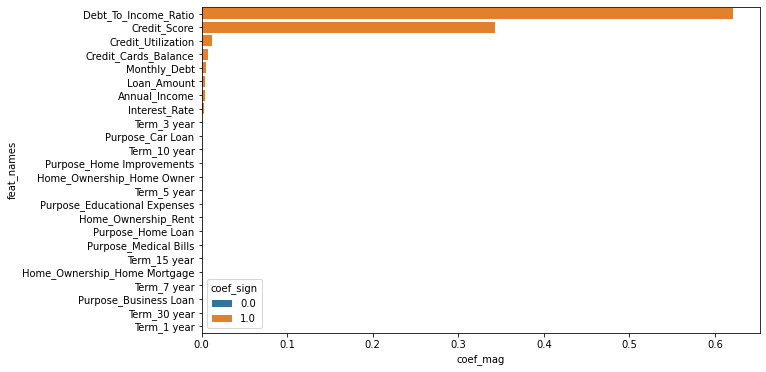

In [115]:
#get names in correct preproc order
cat_names = GB_grid_search.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()
num_names = GB_grid_search.best_estimator_.named_steps['preproc'].transformers_[1][2]

#create df with vip info
coef_info = pd.DataFrame({'feat_names':np.hstack([cat_names, num_names]), 'vip': vip})

#get sign and magnitude information
coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

#sort and plot
coef_info = coef_info.set_index('feat_names').sort_values(by='coef_mag', ascending=False)
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);
plt.rcParams["figure.figsize"] = [10, 6]

### Performance metrics

In [116]:
print(classification_report(y_test, GB_grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3282
           1       0.86      0.76      0.81       665

    accuracy                           0.94      3947
   macro avg       0.91      0.87      0.89      3947
weighted avg       0.94      0.94      0.94      3947



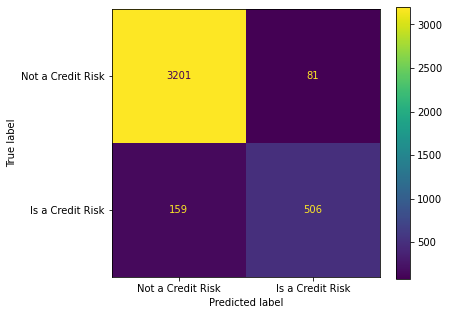

In [118]:
cm = confusion_matrix(y_test, GB_grid_search.best_estimator_.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['Not a Credit Risk', 'Is a Credit Risk'])
disp.plot()
plt.rcParams["figure.figsize"] = [6, 5]
plt.show()

### ROC_curve

Best Threshold=0.161682 
Net Gain=0.839


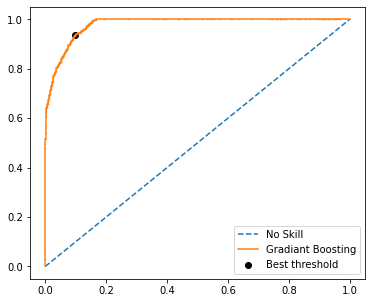

In [119]:
y_pred = GB_grid_search.best_estimator_.predict_proba(X_test)
y_pred = y_pred[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
net_gain = tpr - fpr
ix = np.argmax(net_gain)
print('Best Threshold=%f \nNet Gain=%.3f' % (thresholds[ix], net_gain[ix]))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best threshold')
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Gradiant Boosting', markersize= 0.5)

plt.legend()

plt.rcParams["figure.figsize"] = [8, 5]
plt.show()

### Precision_Recall_curve

Best Threshold=0.485369 
f1 score=0.812


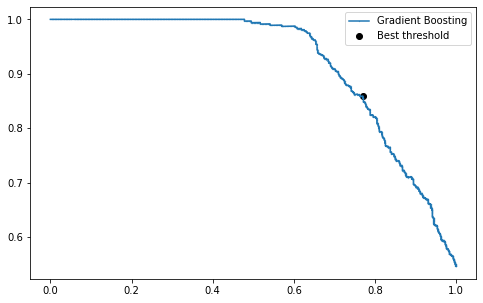

In [120]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
f1 = 2 * ((precision * recall) / (precision + recall))
ix = np.argmax(f1)

print('Best Threshold=%f \nf1 score=%.3f' % (thresholds[ix], f1[ix]))

plt.plot(recall, precision, marker='.', label='Gradient Boosting', markersize= 0.5)
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best threshold')

plt.legend()
plt.show()



---


## Model 2 - Decision Tree Classifier

In [121]:
#generate the whole modeling pipeline with preprocessing
pipe = Pipeline(steps=[('preproc', preproc), ('mdl', DecisionTreeClassifier(random_state=0))]) 

#visualization for steps
with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2548b2bdd0>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2548b2b910>)])),
                ('mdl', DecisionTreeClassifier(random_state=0))])

### Cross-validation with hyperparameter tuning

In [122]:
#hyperparameter tuning
tuning_grid = {'mdl__min_samples_split' : [2,4,6], 'mdl__max_depth': [4,7,10,12],
               "mdl__criterion": ["gini", "entropy"]}
# GridSearchCV is used for cross-validation
DT_grid_search = GridSearchCV(pipe, param_grid = tuning_grid, cv = 5, return_train_score=True)

In [123]:
DT_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('onehot_cat',
                                                                                          OneHotEncoder())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f2548b2bdd0>),
                                                                        ('num_pipe',
                                                                         Pipeline(steps=[('scale_num',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose.

In [124]:
print(DT_grid_search.best_score_)
DT_grid_search.best_params_

0.9368243243243244


{'mdl__criterion': 'entropy',
 'mdl__max_depth': 10,
 'mdl__min_samples_split': 2}

### Final fit 

In [125]:
DT_grid_search.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2548565950>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f25485659d0>)])),
                ('mdl',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        random_state=0))])

### Variable Importance 

In [127]:
vip = DT_grid_search.best_estimator_['mdl'].feature_importances_
vip

array([0.        , 0.        , 0.00225327, 0.00069493, 0.        ,
       0.00090125, 0.        , 0.        , 0.        , 0.00143724,
       0.        , 0.00078879, 0.        , 0.        , 0.        ,
       0.        , 0.00186798, 0.00546979, 0.41614489, 0.006392  ,
       0.00734024, 0.00641819, 0.04762431, 0.50266711])

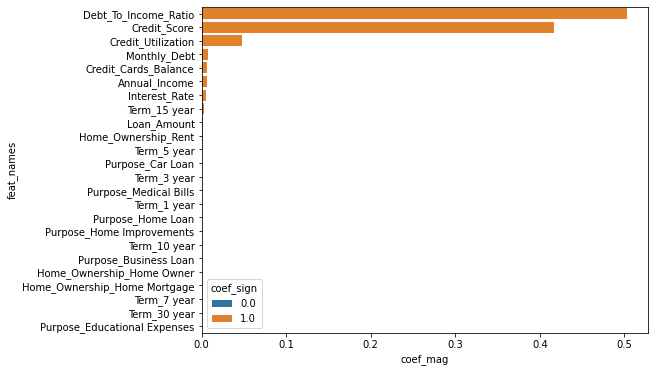

In [130]:
#get names in correct preproc order
cat_names = DT_grid_search.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()
num_names = DT_grid_search.best_estimator_.named_steps['preproc'].transformers_[1][2]
#create df with vip info
coef_info = pd.DataFrame({'feat_names':np.hstack([cat_names, num_names]), 'vip': vip})
#get sign and magnitude information
coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

#sort and plot
coef_info = coef_info.set_index('feat_names').sort_values(by='coef_mag', ascending=False)
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);
plt.rcParams["figure.figsize"] = [8, 6]

### Performance metrics

In [131]:
print(classification_report(y_test, DT_grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3282
           1       0.90      0.69      0.78       665

    accuracy                           0.94      3947
   macro avg       0.92      0.84      0.87      3947
weighted avg       0.93      0.94      0.93      3947



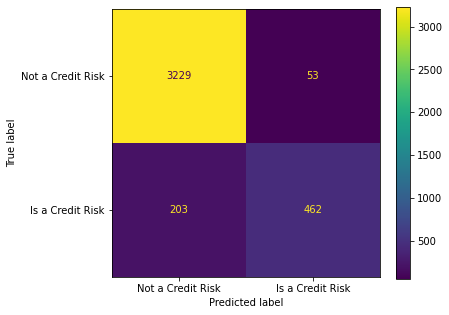

In [133]:
cm = confusion_matrix(y_test, DT_grid_search.best_estimator_.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['Not a Credit Risk', 'Is a Credit Risk'])
disp.plot()
plt.rcParams["figure.figsize"] = [6, 5]
plt.show()

### ROC_curve

Best Threshold=0.055556 
Net Gain=0.830


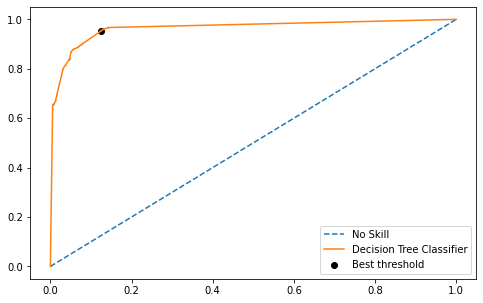

In [136]:
y_pred = DT_grid_search.best_estimator_.predict_proba(X_test)
y_pred = y_pred[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
net_gain = tpr - fpr
ix = np.argmax(net_gain)
print('Best Threshold=%f \nNet Gain=%.3f' % (thresholds[ix], net_gain[ix]))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best threshold')
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Decision Tree Classifier', markersize= 0.5)

plt.legend()

plt.rcParams["figure.figsize"] = [8, 5]
plt.show()

### Precision_Recall_curve

Best Threshold=0.300000 
f1 score=0.819


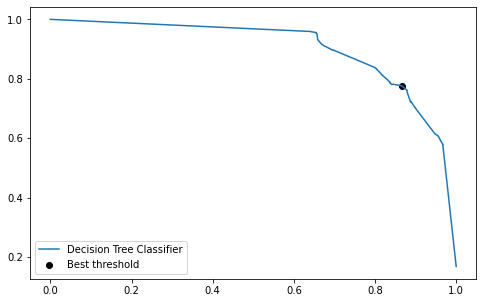

In [135]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
f1 = 2 * ((precision * recall) / (precision + recall))
ix = np.argmax(f1)

print('Best Threshold=%f \nf1 score=%.3f' % (thresholds[ix], f1[ix]))

plt.plot(recall, precision, marker='.', label='Decision Tree Classifier', markersize= 0.5)
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best threshold')

plt.legend()
plt.show()



---


## Model 3 - Gaussian Naive Bayes

In [137]:
#generate the whole modeling pipeline with preprocessing
pipe = Pipeline(steps=[('preproc', preproc),
                       ('mdl', GaussianNB())])

#visualization for steps
with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2548b2bdd0>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2548b2b910>)])),
                ('mdl', GaussianNB())])

### Cross-validation with hyperparameter tuning

In [138]:
#hyperparameter tuning
tuning_grid = {'mdl__var_smoothing' : np.logspace(0,-9, num=100)}
# GridSearchCV is used for cross-validation
NB_grid_search = GridSearchCV(pipe, param_grid = tuning_grid, cv = 5, return_train_score=True)


In [139]:
NB_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('onehot_cat',
                                                                                          OneHotEncoder())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f2548b2bdd0>),
                                                                        ('num_pipe',
                                                                         Pipeline(steps=[('scale_num',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose.

In [140]:
print(NB_grid_search.best_score_)
NB_grid_search.best_params_

0.8888513513513514


{'mdl__var_smoothing': 0.012328467394420659}

### Final fit 

In [141]:
NB_grid_search.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2548768ed0>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('scale_num',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f25487682d0>)])),
                ('mdl', GaussianNB(var_smoothing=0.012328467394420659))])

### Variable Importance 

In [142]:
vip = permutation_importance(NB_grid_search.best_estimator_, X_test, y_test)
vip.importances_mean

array([ 0.00091209,  0.01119838, -0.00025336,  0.03242969, -0.00055739,
        0.00967824,  0.00684064, -0.00040537,  0.00263491,  0.0028376 ,
        0.05964023])

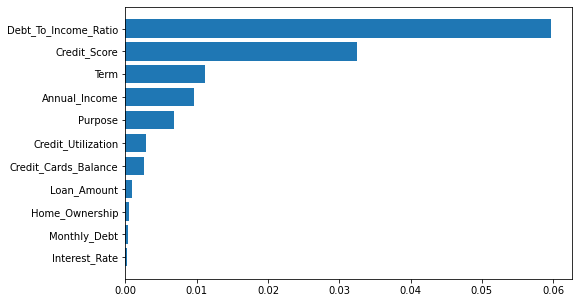

In [143]:
#sort and plot
fig, ax = plt.subplots()
sorted_vip_idx = abs(vip.importances_mean).argsort()
plt.barh(range(len(sorted_vip_idx)), abs(vip['importances_mean'][sorted_vip_idx]))

ax.set_yticks(range(len(sorted_vip_idx)))
ax.set_yticklabels(X_train.columns[sorted_vip_idx])
plt.rcParams["figure.figsize"] = [10, 6]

### Performance metrics

In [144]:
print(classification_report(y_test, NB_grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3282
           1       0.81      0.44      0.57       665

    accuracy                           0.89      3947
   macro avg       0.86      0.71      0.75      3947
weighted avg       0.88      0.89      0.87      3947



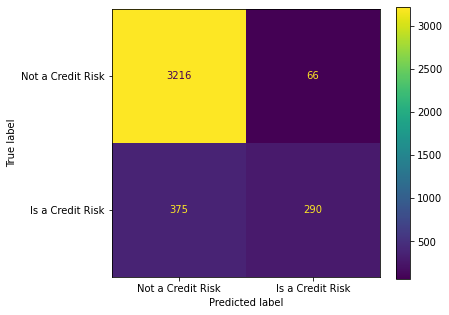

In [146]:
cm = confusion_matrix(y_test, NB_grid_search.best_estimator_.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['Not a Credit Risk', 'Is a Credit Risk'])
disp.plot()
plt.rcParams["figure.figsize"] = [6, 5]
plt.show()

### ROC_curve

Best Threshold=0.026895 
Net Gain=0.587


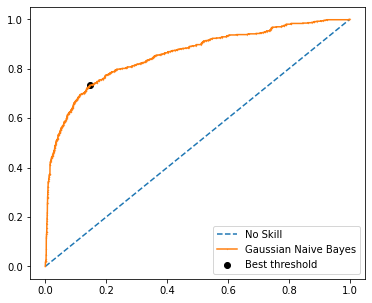

In [147]:
y_pred = NB_grid_search.best_estimator_.predict_proba(X_test)
y_pred = y_pred[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
net_gain = tpr - fpr
ix = np.argmax(net_gain)
print('Best Threshold=%f \nNet Gain=%.3f' % (thresholds[ix], net_gain[ix]))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best threshold')
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Gaussian Naive Bayes', markersize= 0.5)

plt.legend()

plt.rcParams["figure.figsize"] = [8, 5]
plt.show()

### Precision_Recall_curve

Best Threshold=0.090919 
f1 score=0.622


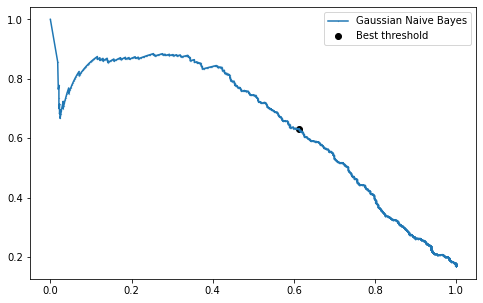

In [148]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
f1 = 2 * ((precision * recall) / (precision + recall))
ix = np.argmax(f1)

print('Best Threshold=%f \nf1 score=%.3f' % (thresholds[ix], f1[ix]))

plt.plot(recall, precision, marker='.', label='Gaussian Naive Bayes', markersize= 0.5)
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best threshold')

plt.legend()
plt.show()

# Model Results






    


## Did the preliminary results match your expectation? 
> I was happy to see the Gradient Boosting model achieved a 92% accuracy. When looking at the f1-scores, I expected the models to score high on predicting those records who are not a risk but, I was not expecting the models ability to flag the records as a crredit risk to be as low. Especially on the Gaussian Naive Bayes which did incredibly poor with a 36% F1 score for predicting the record as a credit risk. Even the Gradient Boosting model did just ok on flagging those as a risk. This tells me the model is failing to flag those who are a credit risk and will need further improvement. 

## Which model performed best?
> **Best:** Gradient Boosting Classifier - 94% accuracy   
**Close Second:** Decision Tree  Classifier - 94% accuracy   
**Worst:** Gaussian Naive Bayes - 89% accuracy 



## Feature Engineering Results

### Results without Feature Engineering 
> **Gradient Boosting**  
Accuracy: 92%        
F1 Score: 
*   Not A credit Risk: 95%
*   Is a Credit Risk: 73%

---
> **Decision Tree Classifer**  
Accuracy:  90%      
F1 Score: 
*   Not A credit Risk: 94%
*   Is a Credit Risk: 68%
 
---
> **Gaussian Naive Bayes**  
Accuracy: 84%    
F1 Score: 
*   Not A credit Risk: 91%
*   Is a Credit Risk: 33%

### Results with Feature1 - Credit_Utilization
> **Gradient Boosting**  
Accuracy: 92%        
F1 Score: 
*   Not A credit Risk: 95%
*   Is a Credit Risk: 74%

---
> **Decision Tree Classifer**  
Accuracy:  90%      
F1 Score: 
*   Not A credit Risk: 94%
*   Is a Credit Risk: 66%
 
---
> **Gaussian Naive Bayes**  
Accuracy: 85%    
F1 Score: 
*   Not A credit Risk: 92%
*   Is a Credit Risk: 36%

### Results with Feature2 - Debt_To_Income_Ratio
> **Gradient Boosting**  
Accuracy: 93%        
F1 Score: 
*   Not A credit Risk: 96%
*   Is a Credit Risk: 78%

---
> **Decision Tree Classifer**  
Accuracy:  93%      
F1 Score: 
*   Not A credit Risk: 96%
*   Is a Credit Risk: 78%
 
---
> **Gaussian Naive Bayes**  
Accuracy: 88%    
F1 Score: 
*   Not A credit Risk: 93%
*   Is a Credit Risk: 53%

### Results with both Feature1 - Credit_Utilization and Feature2 - Debt_To_Income_Ratio
> **Gradient Boosting**  
Accuracy: 94%        
F1 Score: 
*   Not A credit Risk: 96%
*   Is a Credit Risk: 81%

---
> **Decision Tree Classifer**  
Accuracy:  94%      
F1 Score: 
*   Not A credit Risk: 96%
*   Is a Credit Risk: 78%
 
---
> **Gaussian Naive Bayes**  
Accuracy: 89%    
F1 Score: 
*   Not A credit Risk: 94%
*   Is a Credit Risk: 57%

## Feature Engineering Evalutations
Comparisons with no Feature Engineering 
> **Only Feature1 Credit_Utilization:**   
*   **Gradient Boosting:**
The features had minimal impact on the model. The Is Risk F1 Score increased by 1%
*   **Decision Tree:**
The features had minor negative impact on the model. The Is Risk F1 Score decreased by 2%
*   **Gaussian Naive Bayes:**
This model was positively impacted with an increase of 1% in accuracy, %1 in Not a Risk F1 Score, and 3% in Is Risk F1 Score


---


> **Only Feature2 Debt_To_Income_Ratio:**
*   **Gradient Boosting:**
This model was positively impacted with an increase of 1% in accuracy and 5% in Is Risk F1 Score. However, the Not a Risk Score decreased by 1%
*   **Decision Tree:**
This model had a positive improvement in performance with this engineered feature alone. The accuracy improved by 3%, Not a Risk F1 Score improved by 2%, and Is Risk F1 Score improved by a great 10% 
*   **Gaussian Naive Bayes:** This model had a significant improvement in performance with this engineered feature alone. The accuracy improved by 4%, Not a Risk F1 Score improved by 2%, and Is Risk F1 Score majorly improved by 20%

---


> **Feature1 Credit_Utilization and Feature2 Debt_To_Income_Ratio:**
*   **Gradient Boosting:**This model performed better overall with an increase of 2% in accuracy, %1 in Not a Risk F1 Score, and 8% in Is Risk F1 Score
*   **Decision Tree:**
This model performed better overall with an increase of 4% in accuracy, %2 in Not a Risk F1 Score, and 10% in Is Risk F1 Score
*   **Gaussian Naive Bayes:**
This model had a significant improvement in performance with both new features. The accuracy improved by 5%, Not a Risk F1 Score improved by 3%, and Is Risk F1 Score majorly improved by 24%

## Final Feature Engineering Observations 
> **Gradient Boosting:**
The Credit Utilization did not have much of an impact on this model. The Debt to Income Ratio did improved performance on its own however, when both features were added together the improvement was more significant.  

> **Decision Tree:** The Credit Utilization did not have much of an impact on this model, however it did improve a great amount with the second engineered feature - Debt to Income Ratio

> **Gaussian Naive Bayes:** Feature Engineering had a very significant impact on this model